In [3]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.2.2
aext-assistant                    4.20.0
aext-assistant-server             4.20.0
aext-core                         4.20.0
aext-core-server                  4.20.0
aext_environments_server          4.20.0
aext-panels                       4.20.0
aext-panels-server                4.20.0
aext-project-filebrowser-server   4.20.0
aext-share-notebook               4.20.0
aext-share-notebook-server        4.20.0
aext-shared                       4.20.0
aext-toolbox                      4.20.0
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.13.3
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import svm
from tensorflow.keras.layers import Dense , BatchNormalization, Dropout , LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

from sklearn.metrics import precision_score , recall_score , confusion_matrix , accuracy_score , f1_score, classification_report

# Data importing and Data analysis

In [4]:
data_df = pd.read_csv("HF_clinical_dataset.csv")

In [5]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
data_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
data_df.count()

age                         299
anaemia                     299
creatinine_phosphokinase    299
diabetes                    299
ejection_fraction           299
high_blood_pressure         299
platelets                   299
serum_creatinine            299
serum_sodium                299
sex                         299
smoking                     299
time                        299
DEATH_EVENT                 299
dtype: int64

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


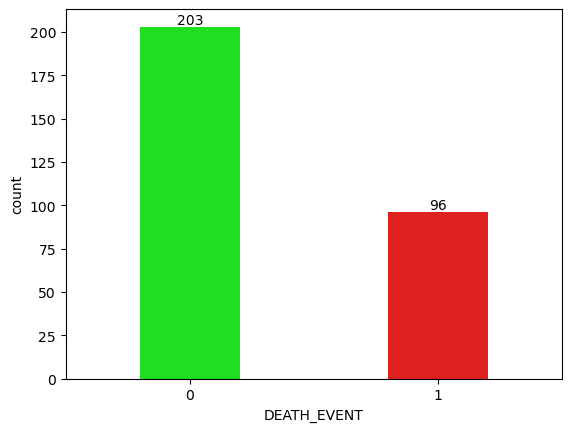

In [9]:
cols = ["#00FF00", "#FF0000"]
df_death = pd.DataFrame(data_df["DEATH_EVENT"])  # Wrap into a DataFrame

ax = sns.countplot(x="DEATH_EVENT",hue="DEATH_EVENT",data=df_death,palette=cols,width=0.4,legend=False)

# Add bar labels safely for all bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()


In [10]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


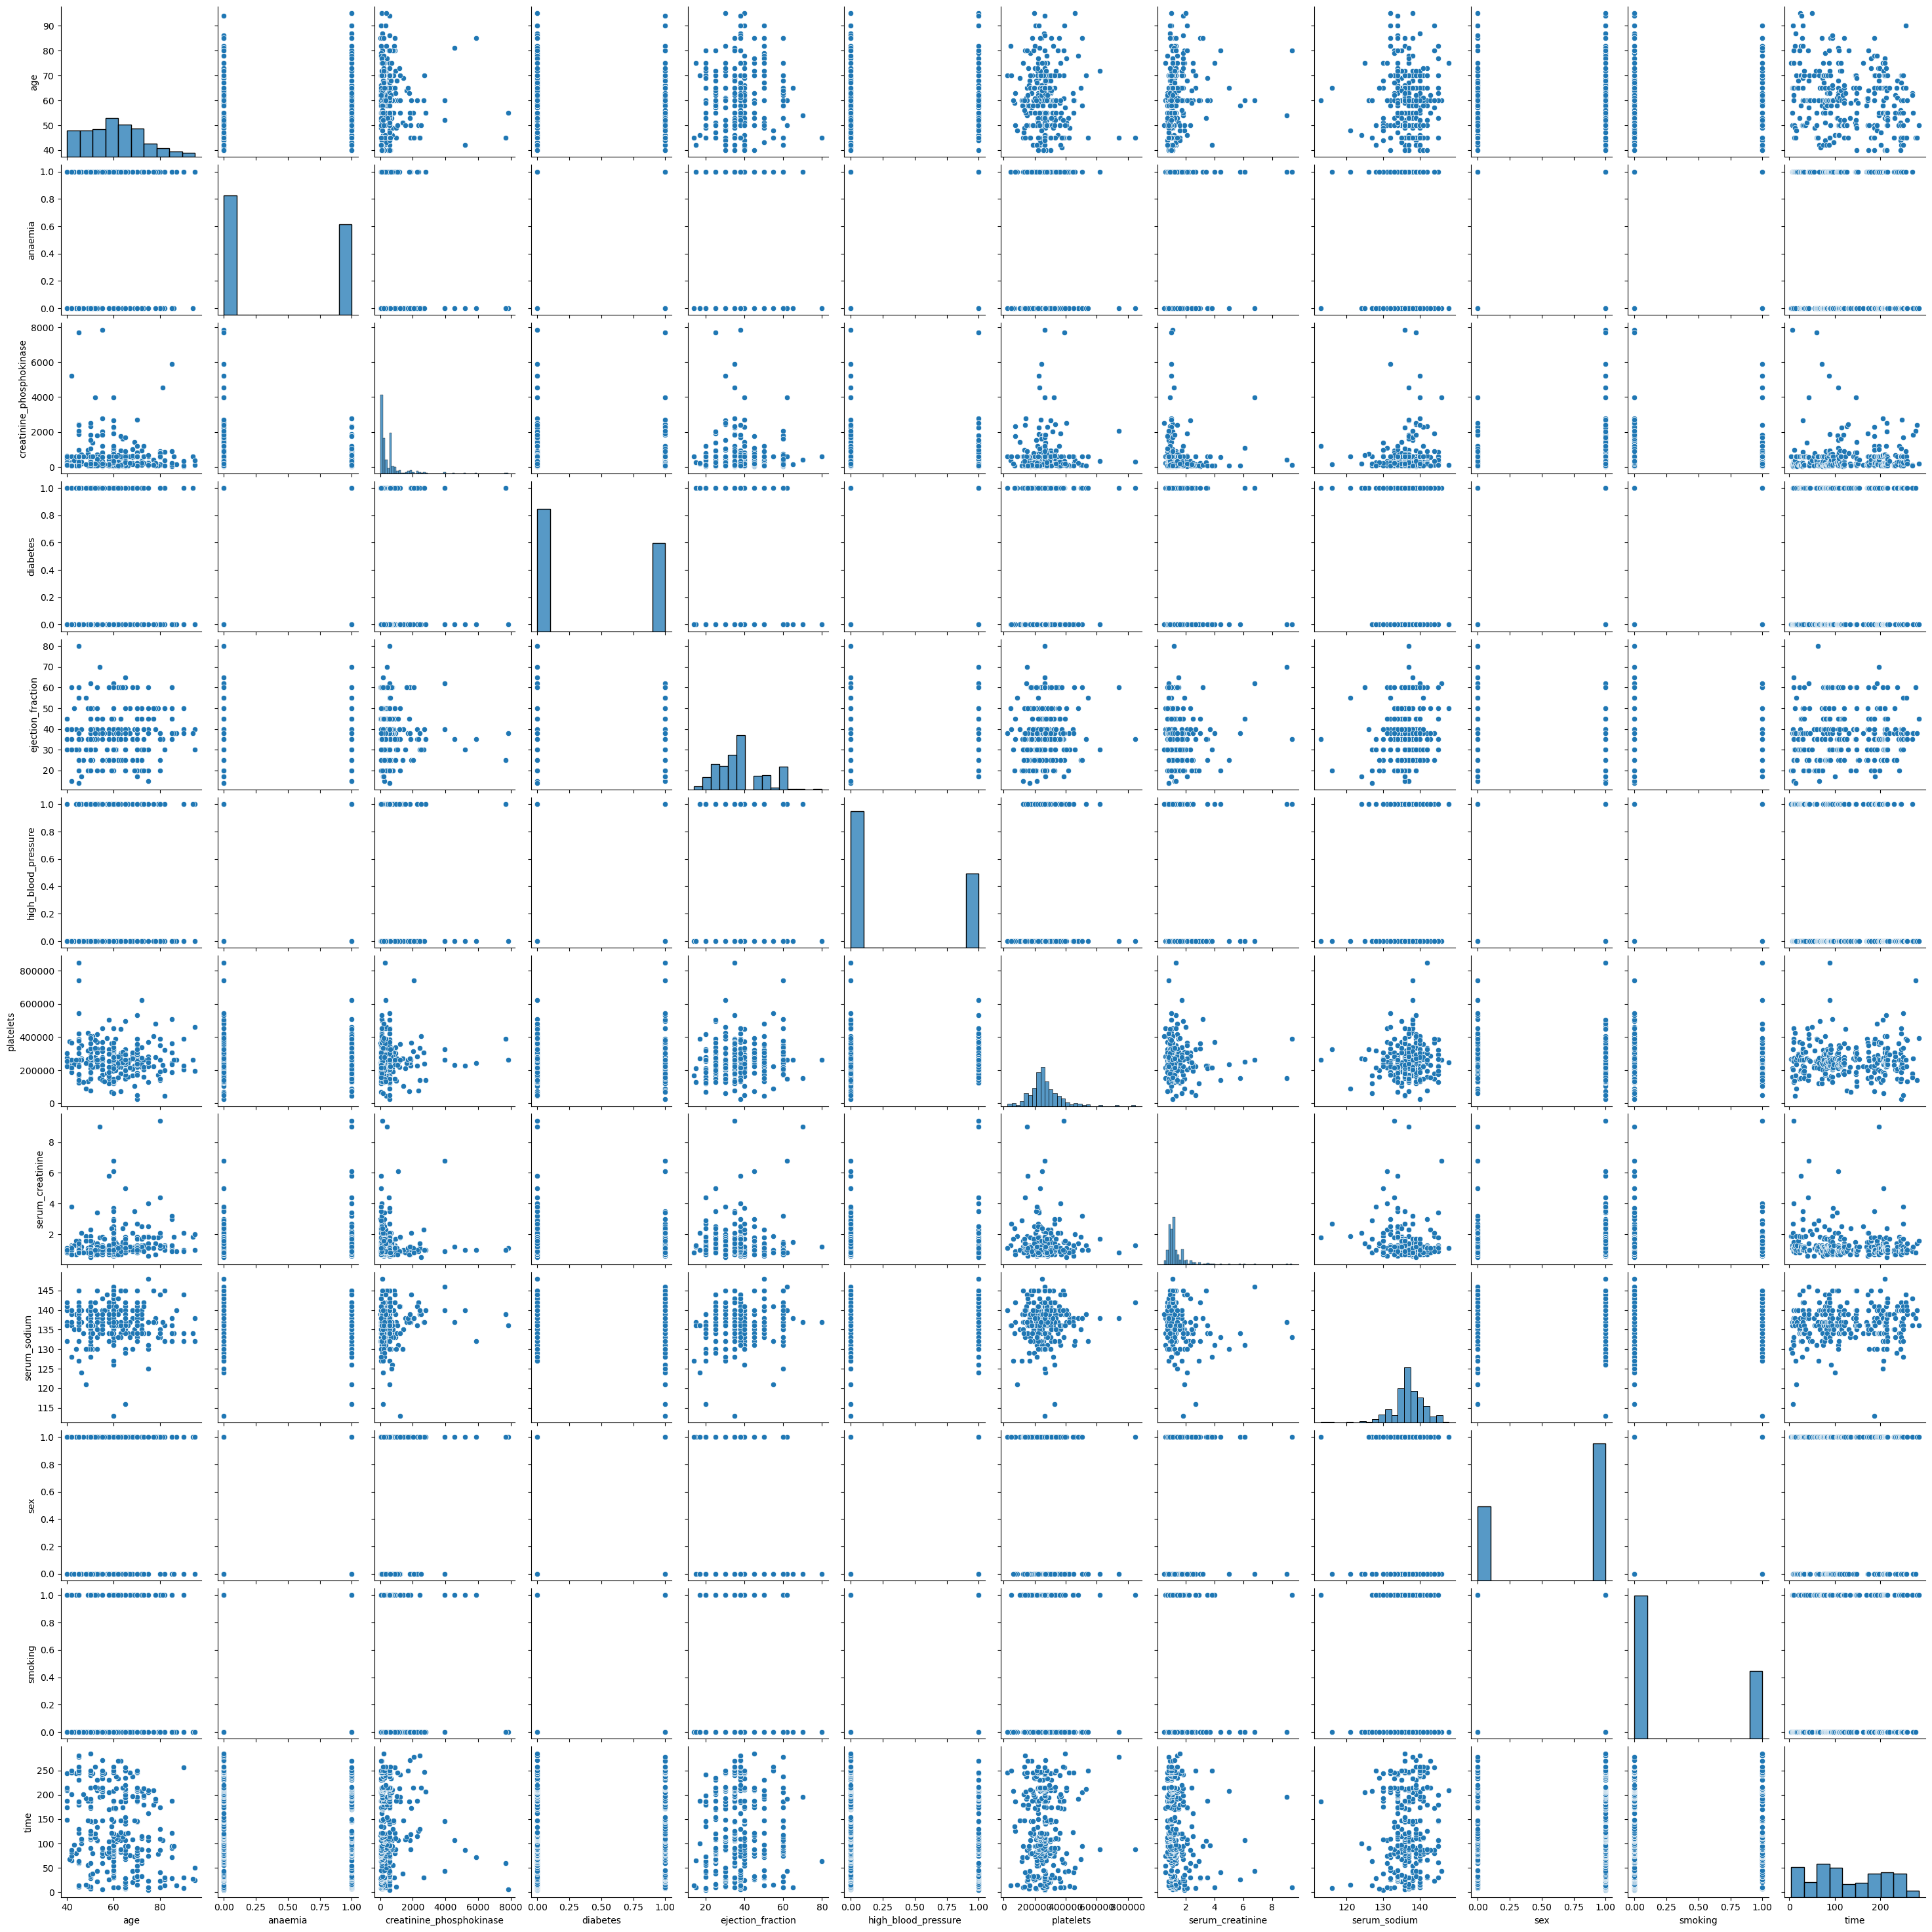

In [62]:
data_df_1 = data_df.drop("DEATH_EVENT",axis=1)
sns.pairplot(data_df_1)  
plt.show()

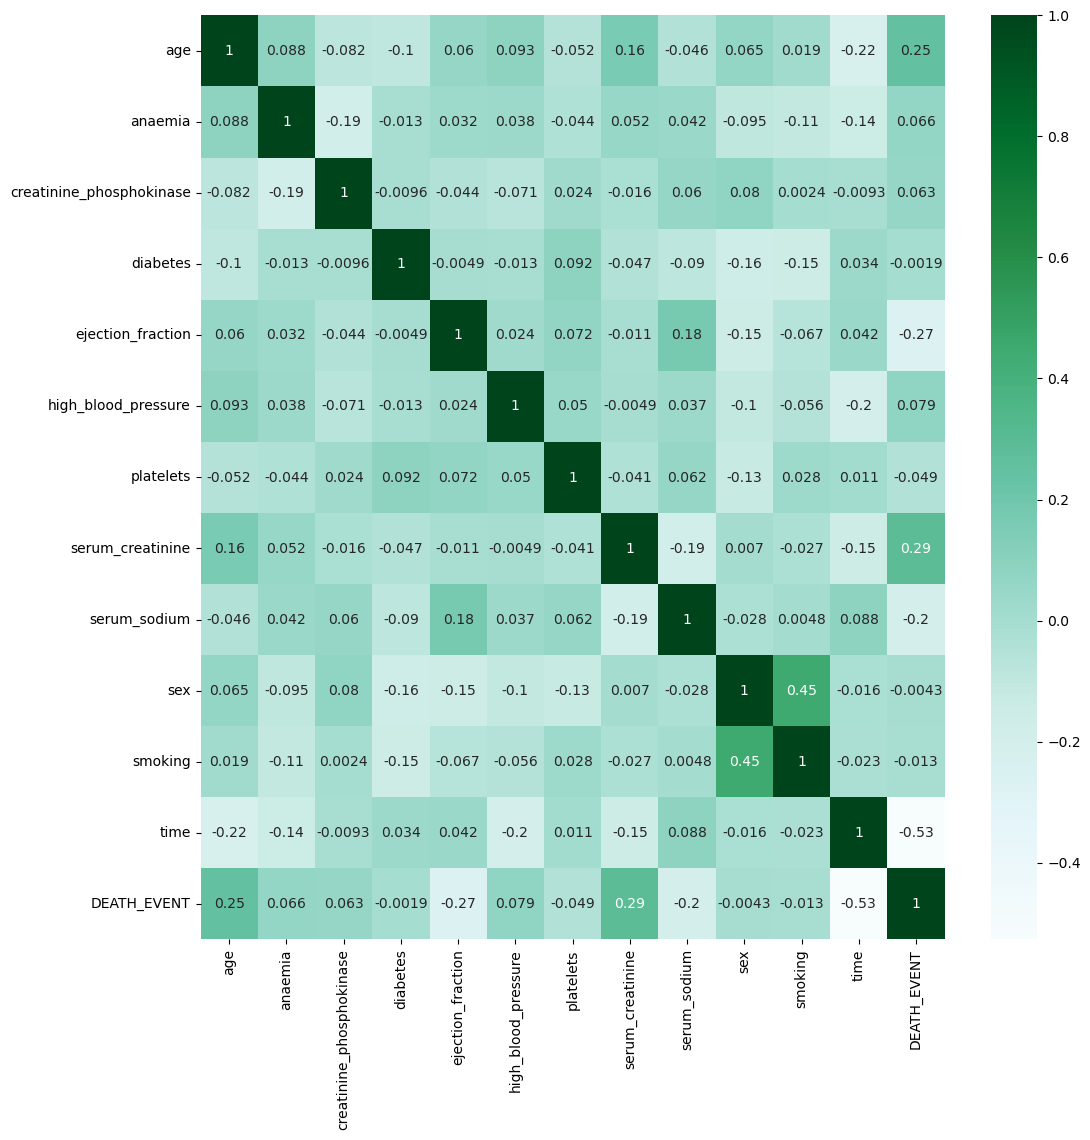

In [11]:
plt.figure(figsize=(12, 12))
sns.heatmap(data_df.corr(),cmap="BuGn",annot = True)

plt.show()

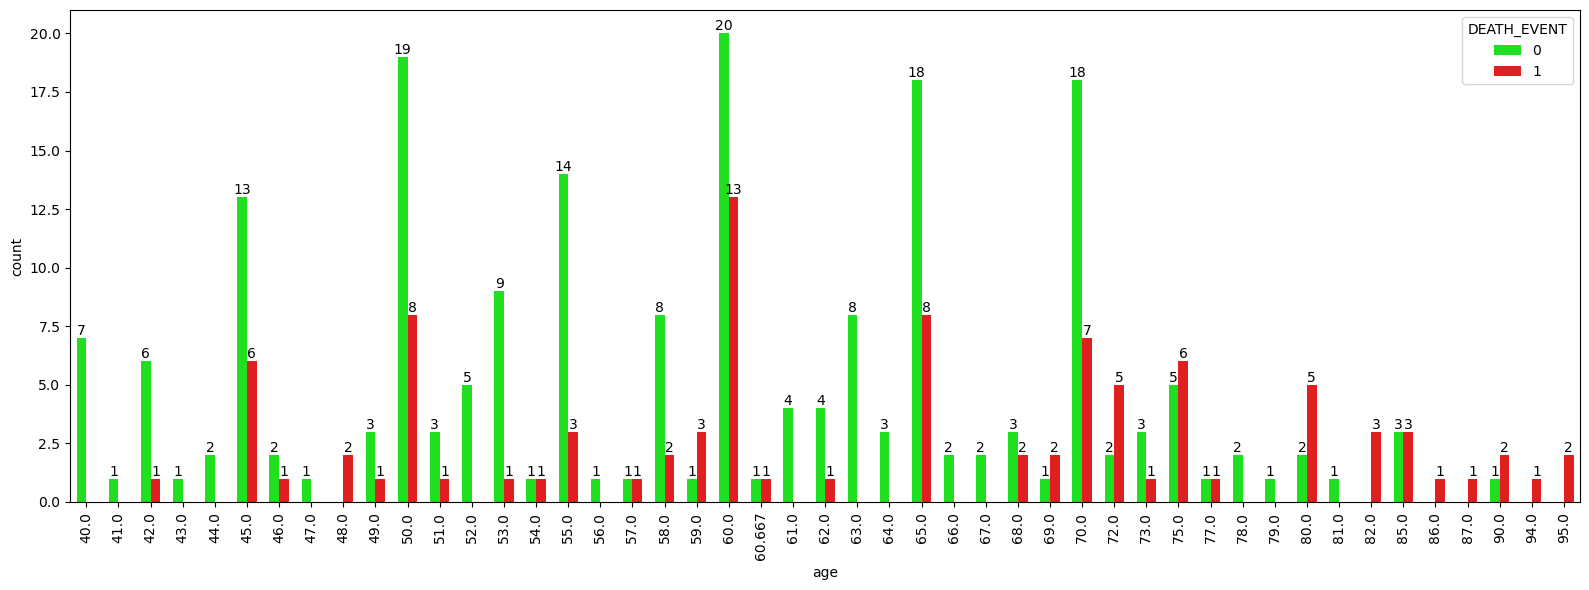

In [12]:
data_age = data_df[["age", "DEATH_EVENT"]]  # Extract age column into a DataFrame

plt.figure(figsize=(16, 6))  # Wider layout for better readability

# Create the countplot
ax = sns.countplot(x="age", data=data_age, hue = "DEATH_EVENT",palette=cols, width=0.6)

plt.xticks(rotation=90)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()


In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

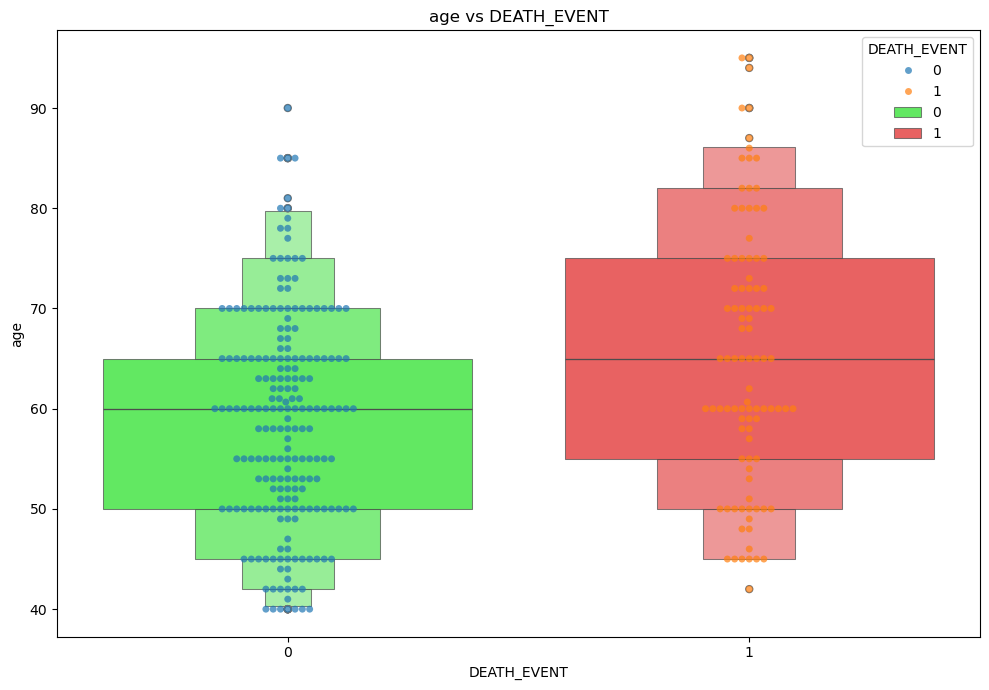

F:\3.Anaconda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


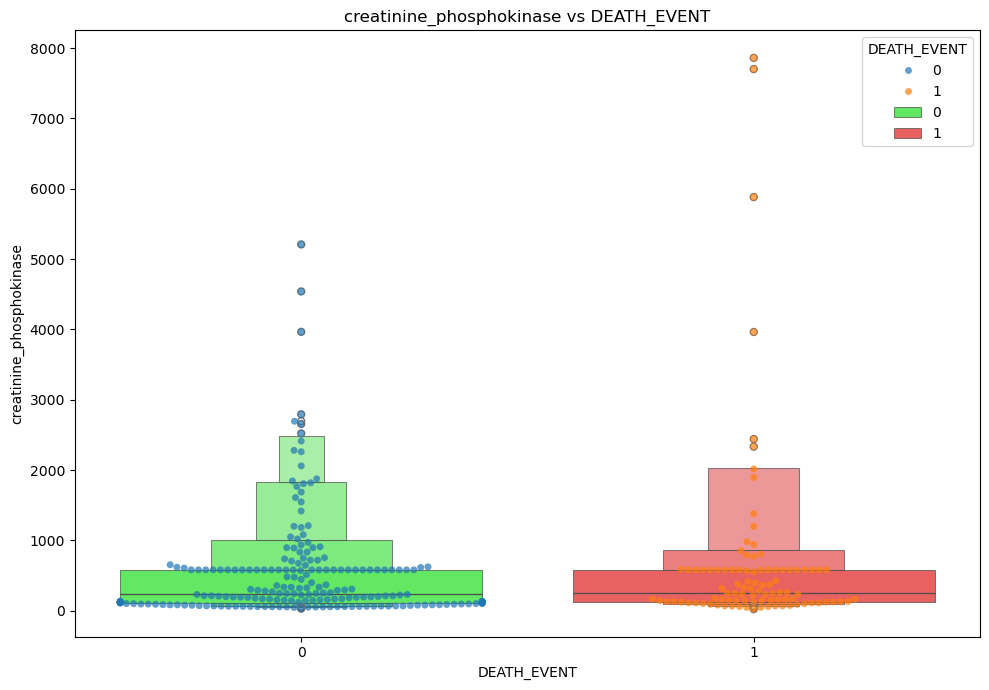

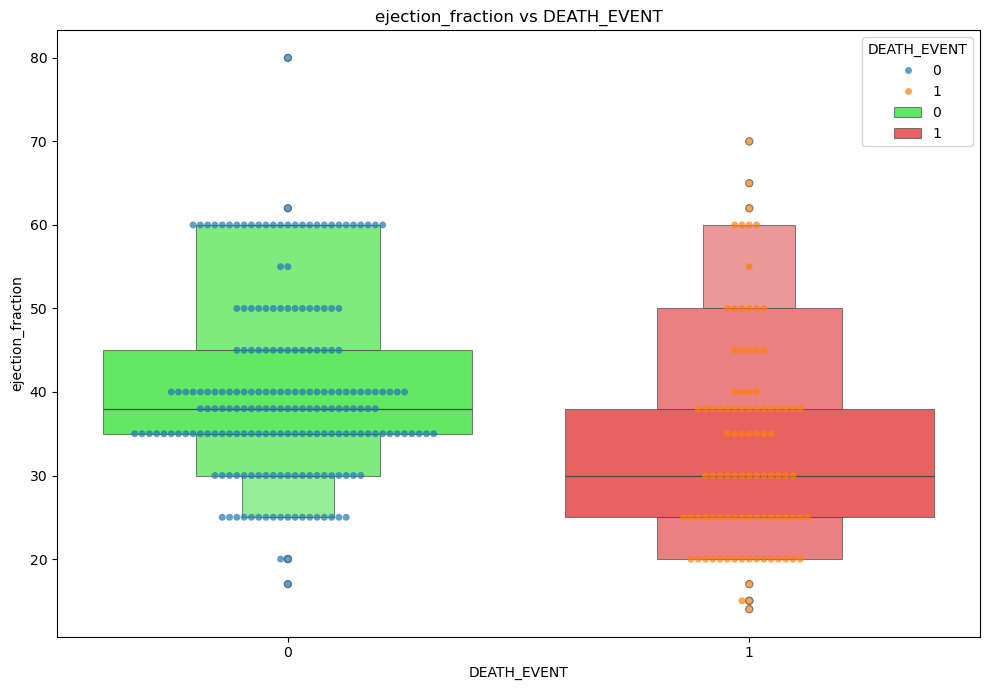

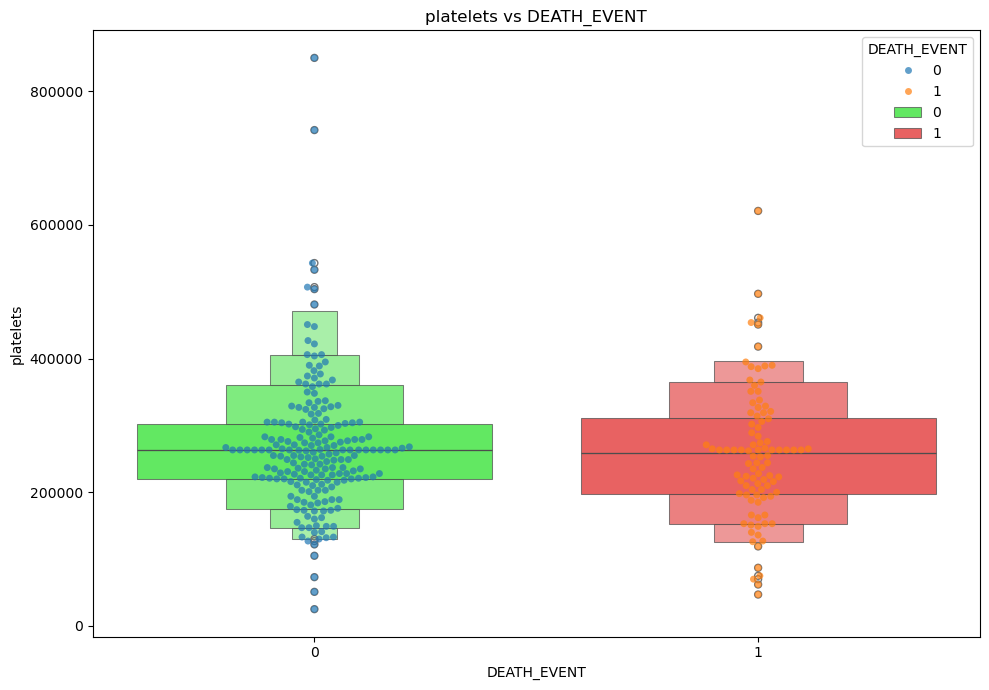

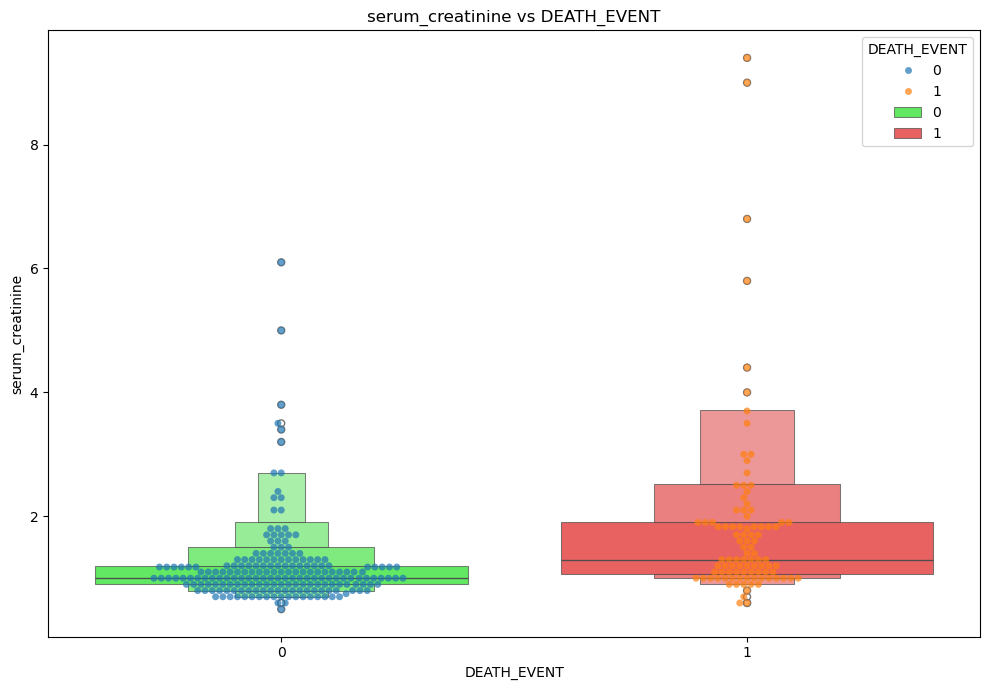

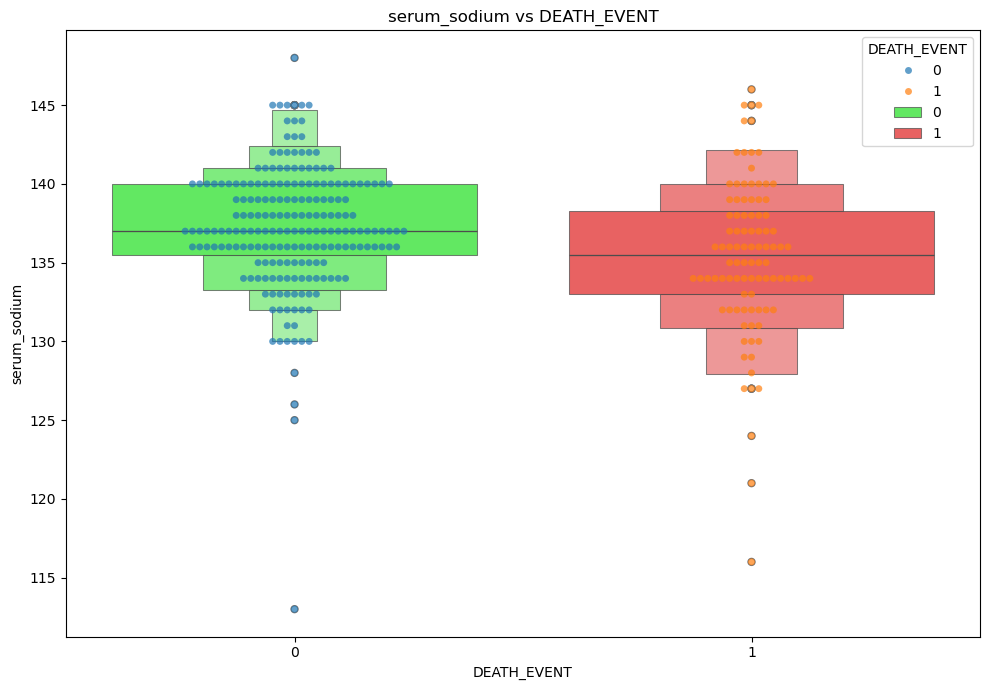

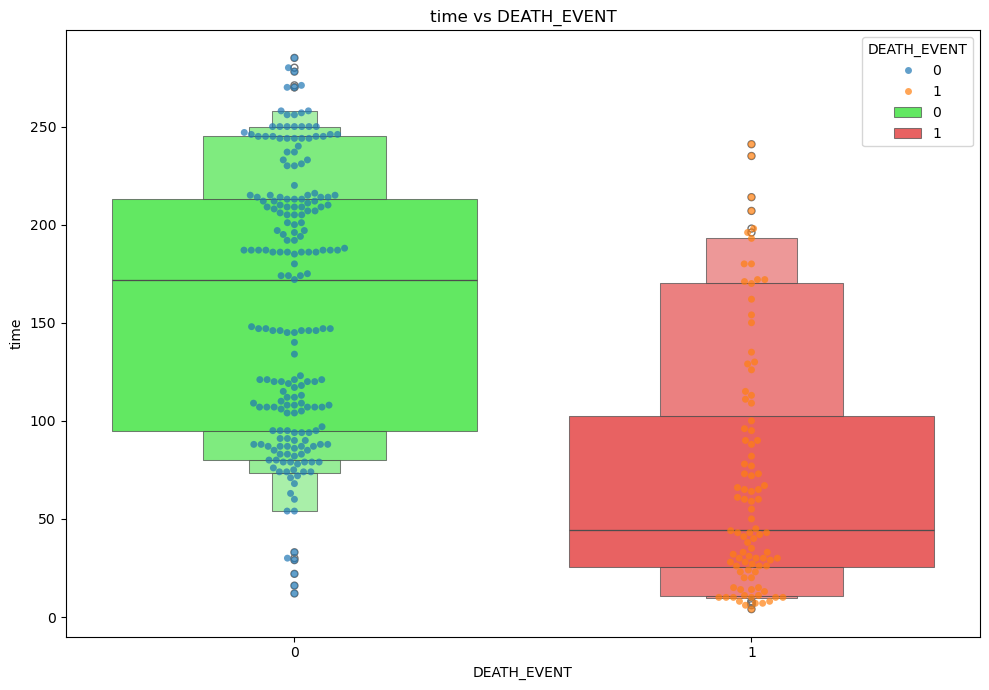

In [28]:
for i in feature:
    plt.figure(figsize=(10, 7))

    # Prepare data with both the feature and DEATH_EVENT
    plot_data = data_df[[i, "DEATH_EVENT"]]

    # Swarmplot
    sns.swarmplot(
        x="DEATH_EVENT", y=i, data=plot_data,
        hue="DEATH_EVENT", alpha=0.7
    )

    # Boxenplot
    sns.boxenplot(
        x="DEATH_EVENT", y=i, data=plot_data,
        hue="DEATH_EVENT", palette=cols, alpha=0.7
    )

    plt.title(f"{i} vs DEATH_EVENT")
    plt.tight_layout()
    plt.show()


# Data Preprocessing

In [21]:
x = data_df.drop("DEATH_EVENT",axis = 1)
y = data_df["DEATH_EVENT"]

In [22]:
col_name = list(x.columns)
s_scaler = preprocessing.StandardScaler()
x_scaled = s_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=col_name)

In [23]:
x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


<Figure size 2000x1000 with 0 Axes>

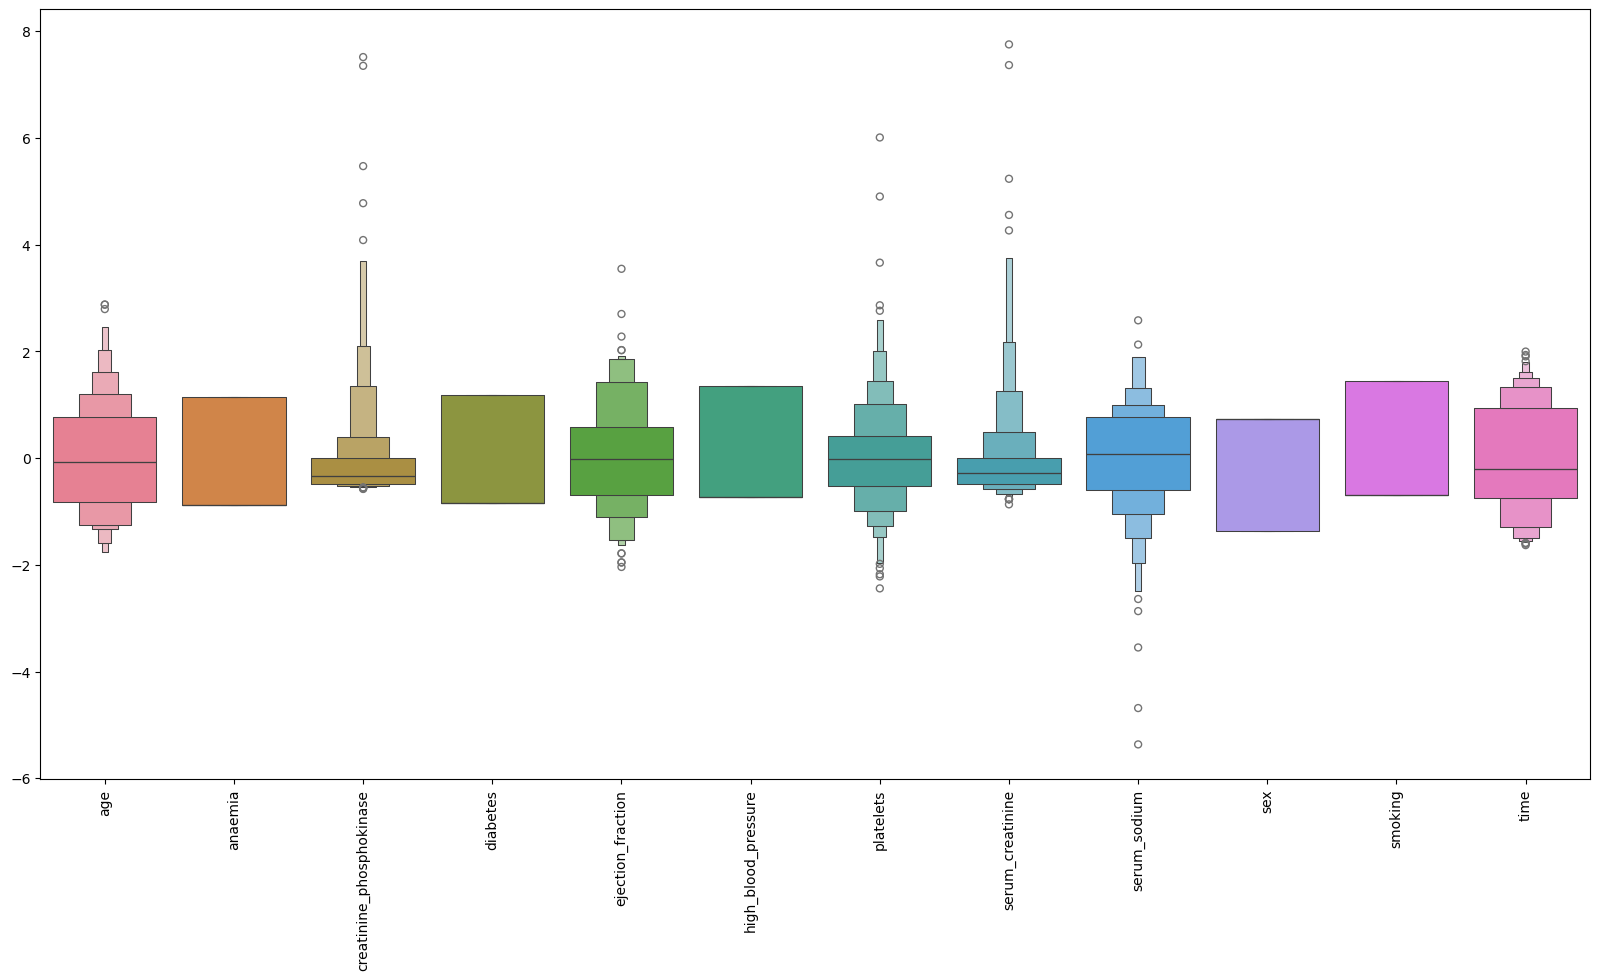

In [34]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=x_scaled)
plt.xticks(rotation=90)
plt.show()

In [36]:
X_train , X_test , Y_train , Y_test = train_test_split(x_scaled,y,test_size=0.3)

# Building Models

## 1. Support Vector Machine

In [143]:
model1 = svm.SVC()

In [144]:
model1.fit(X_train,Y_train,sample_weight=None)

SVC()

In [145]:
Y_pred = model1.predict(X_test)

In [146]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [147]:
np.array(Y_test)

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [148]:
accuracy_score(Y_test,Y_pred)

0.8555555555555555

In [149]:
m1 = classification_report(Y_test,Y_pred)

In [150]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        64
         1.0       0.84      0.62      0.71        26

    accuracy                           0.86        90
   macro avg       0.85      0.78      0.81        90
weighted avg       0.85      0.86      0.85        90



## 2.Neural Networks using TensorFlow

In [95]:
early_stopping = callbacks.EarlyStopping(min_delta = 0.00001 , patience = 20 ,restore_best_weights = True)

layer_1 = Dense(units = 16 , kernel_initializer = 'uniform' , activation = 'relu' , input_shape = (12,))
layer_2 = Dense(units = 8 , kernel_initializer = 'uniform' , activation = 'relu')
layer_3 = Dropout(0.25)
layer_4 = Dense(units = 8 , kernel_initializer = 'uniform' , activation = 'relu')
layer_5 = Dropout(0.5)
layer_6 = Dense(units = 1 , kernel_initializer = 'uniform' , activation = 'sigmoid')

model2 = Sequential([layer_1,layer_2,layer_3,layer_4,layer_5,layer_6])

F:\3.Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [97]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
history = model2.fit(X_train,Y_train,batch_size=25,epochs=200,callbacks=[early_stopping],validation_split=0.25)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4931 - loss: 0.6929 - val_accuracy: 0.6415 - val_loss: 0.6923
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6864 - loss: 0.6918 - val_accuracy: 0.6415 - val_loss: 0.6914
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6563 - loss: 0.6910 - val_accuracy: 0.6415 - val_loss: 0.6906
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6894 - loss: 0.6894 - val_accuracy: 0.6415 - val_loss: 0.6897
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7008 - loss: 0.6879 - val_accuracy: 0.6415 - val_loss: 0.6887
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6511 - loss: 0.6881 - val_accuracy: 0.6415 - val_loss: 0.6879
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6955 - loss: 0.6855 - val_accuracy: 0.6415 - val_loss: 0.6868
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6839 - loss: 0.6846 - val_accuracy: 0.6415 - val_loss: 0.

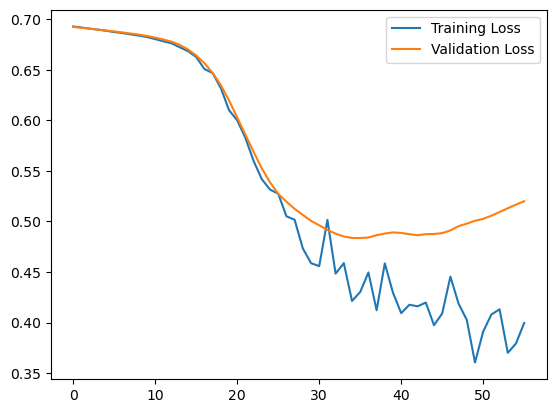

In [101]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']],label="Training Loss")
plt.plot(history_df.loc[:,['val_loss']],label="Validation Loss")
plt.legend()
plt.show()

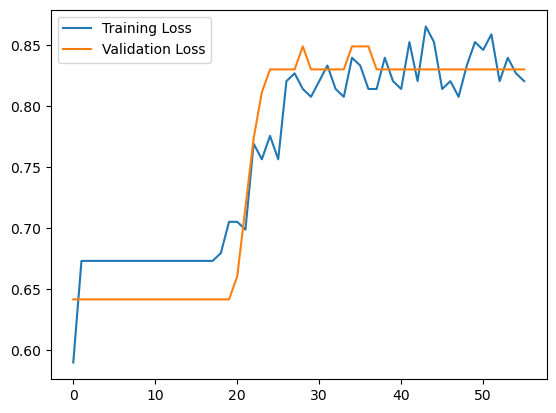

In [104]:
plt.plot(history_df.loc[:,['accuracy']],label="Training Loss")
plt.plot(history_df.loc[:,['val_accuracy']],label="Validation Loss")
plt.legend()
plt.show()

In [151]:
Y_pred = model2.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [152]:
Y_pred.shape

(90, 1)

In [153]:
Y_pred = (Y_pred > 0.5).astype(int)  

In [154]:
Y_test = np.array(Y_test,dtype='float32',like=Y_pred)

In [155]:
Y_test = Y_test.reshape(-1, 1)

In [156]:
Y_test.shape

(90, 1)

In [157]:
m2 = classification_report(Y_test,Y_pred)

In [158]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        64
         1.0       0.82      0.69      0.75        26

    accuracy                           0.87        90
   macro avg       0.85      0.81      0.83        90
weighted avg       0.86      0.87      0.86        90



In [160]:
print(m1)

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        64
         1.0       0.84      0.62      0.71        26

    accuracy                           0.86        90
   macro avg       0.85      0.78      0.81        90
weighted avg       0.85      0.86      0.85        90

